In [5]:
# %update pip package & install ktrain

!pip install -U pip
!pip install ktrain

In [7]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from nltk import word_tokenize
import string
import re

import warnings
warnings.filterwarnings("ignore")

In [8]:
# %loading datasets from data dir
df = pd.read_csv("data/Train.csv")

# Total Records
print("Total Records: ", df.shape[0])

# % preview data from top
df.head()

Total Records:  5151


,id,content,category
0,SW0,SERIKALI imesema haitakuwa tayari kuona amani...,Kitaifa
1,SW1,"Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti...",Biashara
2,SW10,SERIKALI imetoa miezi sita kwa taasisi zote z...,Kitaifa
3,SW100,KAMPUNI ya mchezo wa kubahatisha ya M-bet ime...,michezo
4,SW1000,WATANZANIA wamekumbushwa kusherehekea sikukuu...,Kitaifa


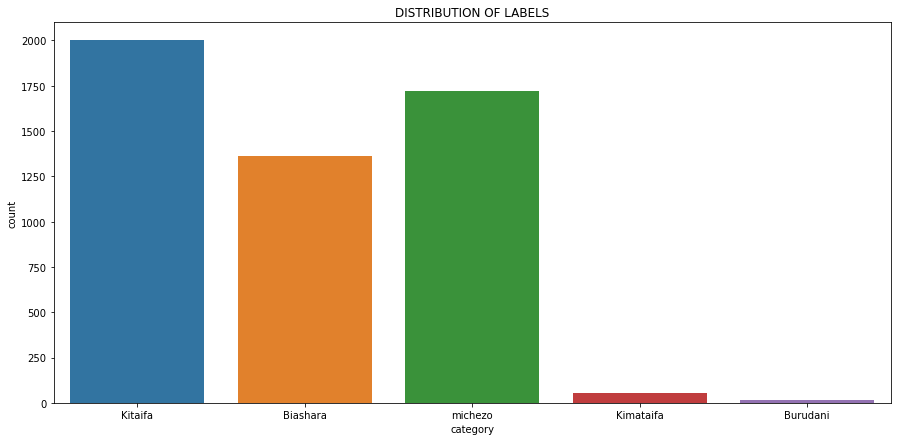

In [7]:
# %Let's visualize the Label distiributions using seaborn
plt.figure(figsize=(15,7))
sns.countplot(x='category',data=df)
plt.title("DISTRIBUTION OF LABELS")
plt.show()

In [9]:
# %function to clean text
def clean_text(sentence):
    '''
        function to clean content column, make it ready for transformation and modeling
    '''
    sentence = sentence.lower()                #convert text to lower-case
    sentence = re.sub('â€˜','',sentence)    # remove the text â€˜ which appears to occur flequently
    sentence = re.sub('[‘’“”…,]', '', sentence) # remove punctuation
    sentence = re.sub('[()]', '', sentence)  #remove parentheses
    sentence = re.sub("[^a-zA-Z]"," ",sentence) #remove numbers and keep text/alphabet only
    sentence = word_tokenize(sentence)      # remove repeated characters (tanzaniaaaaaaaa to tanzania)
    
    return ' '.join(sentence)

In [10]:
# % Applying  clean_text function on contents
df['content'] = df['content'].apply(clean_text)   
df.head()

,id,content,category
0,SW0,serikali imesema haitakuwa tayari kuona amani ...,Kitaifa
1,SW1,mkuu wa mkoa wa tabora aggrey mwanri amesitish...,Biashara
2,SW10,serikali imetoa miezi sita kwa taasisi zote za...,Kitaifa
3,SW100,kampuni ya mchezo wa kubahatisha ya m bet imei...,michezo
4,SW1000,watanzania wamekumbushwa kusherehekea sikukuu ...,Kitaifa


In [11]:
df = df[['category', 'content']] 
SEED = 2020
df_train = df.sample(frac=0.85, random_state=SEED)
df_test = df.drop(df_train.index)
len(df_train), len(df_test)

(4378, 773)

In [16]:
import ktrain
from ktrain import text

# %selecting transformer to use
MODEL_NAME = 'bert-base-multilingual-uncased'

# %Common parameters
MAXLEN  = 128 
batch_size = 32 
learning_rate = 5e-5 
epochs = 3